# Problem 1

 Some film review aggregator websites publish ranked lists of movies based on the number of
positive critical reviews out of a total number counted for each movie. Sometimes an
“adjusted score” is used, for which a movie with a higher approval percentage can actually
rank lower on the list.


Consider the following hypothetical scenario:

Movie 1:
9 positive reviews out of 10 (90%)

Movie 2:
425 positive reviews out of 500 (85%)


Assume that reviews of Movie i have a common probability pi of being positive (depending
on the movie) and are independent (conditional on pi). Assume a U(0, 1) prior on each pi
.


a) Determine the posterior distribution of p1 and of p2 (separately). (Name the
type of distribution and give the values of its defining constants.)

Let *θ* represent the proportion of positive reviews for a movie (out of all its reviews), *y* represent the number of positive reviews for a movie, and *n* represent the total number of reviews for a movie, so that we can say we have a sampling distribution represented by the following:

$y | θ$ ~ Bin($n, θ$)

Its sampling density will then be:

$p(y | θ) = \binom{n}{y}  θ^y (1 - θ)^{n-y}$, for $y$ = 0,...,$n$


For the case of Movie 1:

$y = 9$

$n = 10$

Plugging those values into the sampling density gives us the following likelihood:

$p(y=9 | θ) = \binom{10}{9}  θ^9 (1 - θ)^{10-9} ∝ θ^9 (1 - θ)$



Given a uniform prior on *p* we can then say that $p(θ) = 1$ for values of θ between 0 and 1.

Next, apply Bayes' rule to get the posterior density:

$p(θ | y=9) ∝ (1)  θ^9 (1 - θ)^{10-9} ∝ θ^9 (1 - θ)$

From there, we can say that the posterior distribution for Movie 1 will be:

$θ | y = 9$ ~ Beta$(α = 10, β = 2)$

Using the same process as above, the posterior distribution for Movie 2 (where $y = 425$ and $n = 500$) will be:

$θ | y = 425$ ~ Beta$(α = 426, β = 76)$

b) Which movie ranks higher according to posterior mean? According to posterior
median? According to posterior mode? Show your computations. (For median, use R
function qbeta. For mean and mode, use formulas in BDA3, Table A.1. Do not use
simulation, as it may not be sufficiently accurate.)

The posterior mean for Movie 1 is as follows:

$ E(θ | y = 9)$ = $α \over α + β $ = $10 \over 10 + 2$ $≈ 0.833$

And the posterior mean for Movie 2 is:

$ E(θ | y = 425)$ = $α \over α + β $ = $426 \over 426 + 76$ $≈ 0.849$


According to posterior mean, Movie 2 ranks higher.

The posterior mode for Movie 1 is as follows:

$ E(θ | y = 9)$ = $α - 1 \over α + β - 2 $ = $10 - 1 \over 10 + 2 - 2$ $= 0.9$

And the posterior mode for Movie 2 is:

$ E(θ | y = 425)$ = $α - 1 \over α + β - 2 $ = $426 - 1 \over 426 + 76 - 2$ $= 0.85$

According to posterior mode, Movie 1 ranks higher.

Using the R function qbeta, the posterior median for Movie 1 is as follows:

In [48]:
posterior.samples <- qbeta(c(0.5), 10, 2)
median(posterior.samples)

[1] 0.8520366

And the posterior median for Movie 2 is:

In [49]:
posterior.samples <- qbeta(c(0.5), 426, 76)
median(posterior.samples)

[1] 0.8490687

According to posterior median, Movie 1 ranks higher.

# Problem 2

 File **randomwikipedia.txt** contains the ID number and number of bytes in length for 20
randomly selected English Wikipedia articles.

(a) (i) Display a histogram of article length, and describe the distribution.


In [51]:
data <- read.table("randomwikipedia.txt", header = TRUE)

In [52]:
head(data)

,pageID,bytes
,<int>,<int>
1,3952653,18284
2,22091611,2222
3,72611703,4037
4,1995807,7533
5,64302262,984
6,12066155,10881


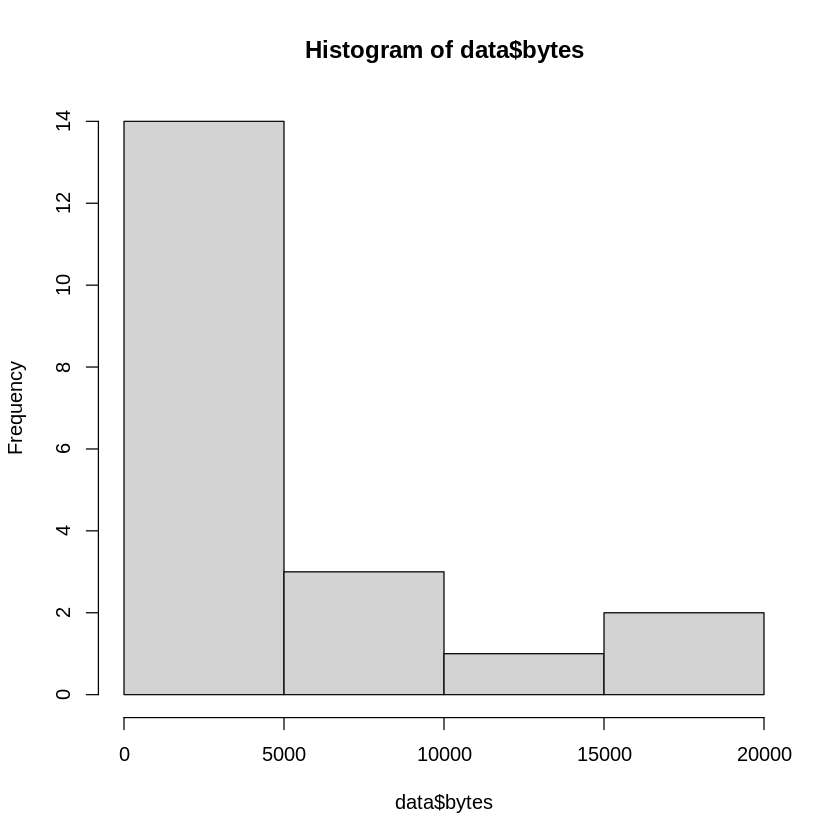

In [53]:
hist(data$bytes)

In [54]:
summary(data$bytes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    323    1434    3330    5146    7541   18284 

As shown in the histogram above, the distribution is skewed to the right.

(a) (ii) Transform article length to the (natural) log scale. Then re-display the
histogram and describe the distribution.

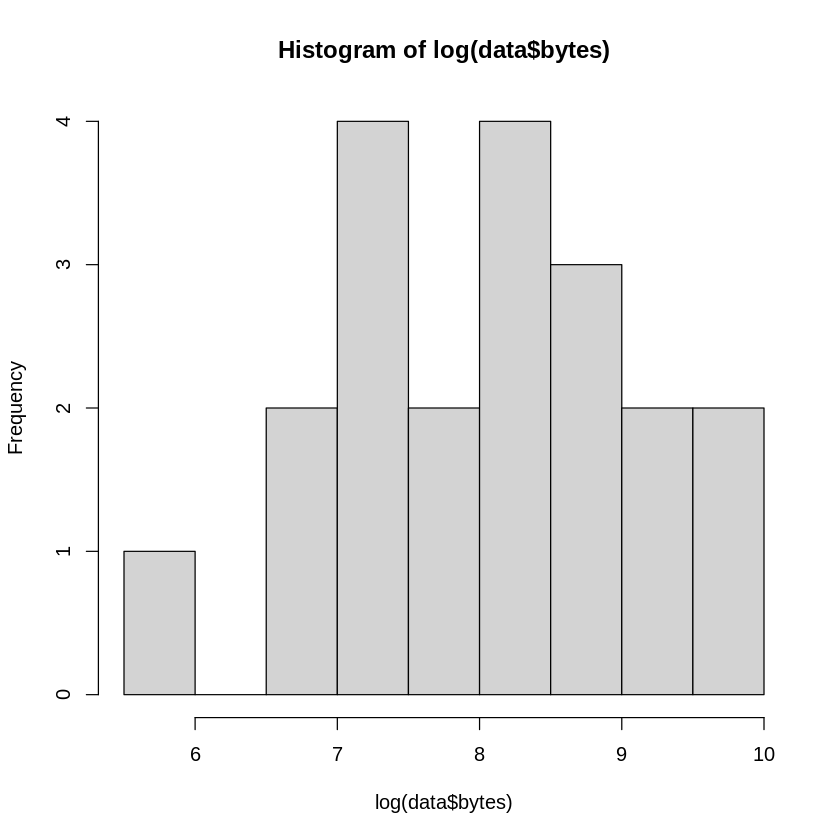

In [55]:
hist(log(data$bytes))

In [56]:
summary(log(data$bytes))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.778   7.268   8.109   8.050   8.928   9.814 

After transforming to the log scale, the histogram is less right-skewed than it was previously and looks (more) like a normal distribution.

(a) (iii) Based on your histograms, explain why the log scale would be better to use
for the remainder of the analysis.

Since the instructions in the next section ask us to assume that the $y_i$s (representing the lengths of article i) have a normal sampling distribution, I would say that it would be better to use the log scale for the remainder of the analysis because we can see from the two histograms plotted above that the log scale produces a distribution that looks much more normal than the untransformed data.

(b) Let $y_i$ be length of article $i$ on the $log$ scale: the natural logarithm of the
number of bytes. Compute the sample mean and sample variance of $y_1, . . . , y_{20}$.


The sample mean is as follows:

$\overline{y} = \frac{1}{n} \sum_{i=1}^{n} y_{i} = 8.050$

In [57]:
mean(log(data$bytes))

[1] 8.050194

The sample variance is as follows:

$s^2 = \frac{\sum_{i=1}^{n} (y_{i} - \overline{y})^2}{n-1} = 1.147$

In [58]:
var(log(data$bytes))

[1] 1.147371

(c) Assume $\sigma ^ 2$
is known to equal the sample variance. Consider a flat prior for $μ$ Use it to:

(i)Compute the posterior mean of µ, posterior variance of µ, and posterior
precision of µ.

The conjugate prior for μ will also have a normal distribution:

$μ \sim$ N($μ_0, τ_0$)

We can then say

$p(μ) ∝$ exp($-\frac{1}{2τ_0^2}(μ - μ_0)^2$)

and thus the posterior density for μ given $y$ will be the following:

$p(μ$ | $y) ∝ p(\mu) p(y$ | $μ) ∝ $ exp($-\frac{1}{2τ_n^2}(μ - μ_n)^2$)

where $μ_n = \frac{\frac{1}{τ_0^2}\mu_0 + \frac{n}{σ^2}\overline{y}}{\frac{1}{τ_0^2} + \frac{n}{σ^2}}$ and $\frac{1}{τ_n^2} = \frac{1}{τ_0^2} + \frac{n}{σ^2}$

From the prior problems in this set, we already know that $\overline{y}$ = 8.050, $\mu_0$ = 8.109, and $τ_0^2$ = $s^2$ = 1.147. Using those values, we can calculate that the posterior mean $μ_n$ = 8.053, the posterior variance $τ_n^2$ = 0.055, and the posterior precision $\frac{1}{τ_n^2}$ = 18.309.

In [59]:
y_bar = 8.050
mu_0 = 8.109
tau_0_squared = 1.147
n = nrow(data)

In [60]:
mu_n = ((mu_0/tau_0_squared)+(y_bar*n/tau_0_squared))/((1/tau_0_squared)+n/tau_0_squared)
print(mu_n)

[1] 8.05281


In [61]:
tau_n_squared = 1/((1/tau_0_squared)+(n/tau_0_squared))
print(tau_n_squared)

[1] 0.05461905


In [62]:
posterior.precision = (1/tau_0_squared)+(n/tau_0_squared)
print(posterior.precision)

[1] 18.30863


(ii) Plot a prior density of µ and a posterior density of µ together in a single
plot. Label which density is which.


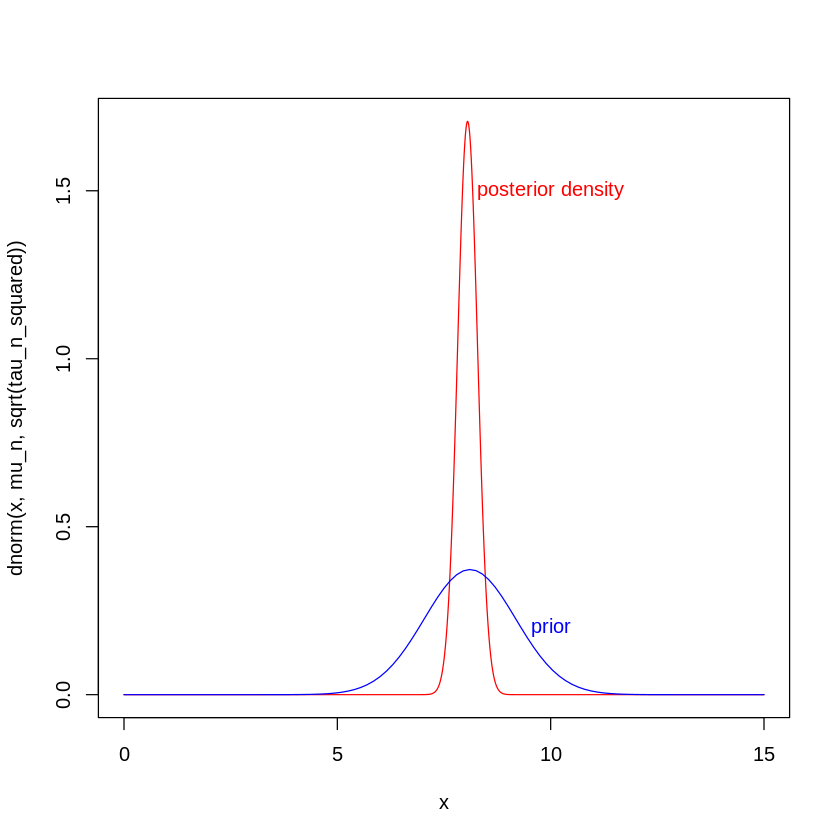

In [63]:
curve(dnorm(x,mu_n,sqrt(tau_n_squared)), 0, 15, n=1000, col="red")
curve(dnorm(x,mu_0,sqrt(tau_0_squared)), 0, 15, add=TRUE, col="blue")
text(10, 1.5, "posterior density", col="red")
text(10, 0.2, "prior", col="blue")

(iii) Compute a 95% central posterior interval for µ.

In [64]:
qnorm(0.95)

[1] 1.644854

In [65]:
margin_of_error <- 1.645 * sqrt(tau_n_squared)
mu_n - margin_of_error
mu_n + margin_of_error

[1] 7.668361

[1] 8.437258

A 95% central posterior interval for μ would be approximately (7.668, 8.437).

(d) Now treat σ
2 as unknown, and let µ and σ^2 have prior

$p(μ, σ^2) ∝$

